In [0]:
# ! pip install --upgrade Cython
# ! pip install --upgrade git+https://github.com/statsmodels/statsmodels


In [43]:
!pip install PyDrive

In [44]:
!pip install -U nltk

Requirement already up-to-date: nltk in /usr/local/lib/python3.6/dist-packages (3.4.3)


In [0]:
import os 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import datetime
# import statsmodels.api as sm
import pandas as pd
import json
import numpy as np

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1lGtCEM-xnHGdjam4JKgzEzgHtXjWQB_1'})
download.GetContentFile('Data.zip')


In [7]:
!unzip Data.zip

Archive:  Data.zip
  inflating: ECE219_tweet_data/tweets_#gohawks.txt  
  inflating: ECE219_tweet_data/tweets_#gopatriots.txt  
  inflating: ECE219_tweet_data/tweets_#nfl.txt  
  inflating: ECE219_tweet_data/tweets_#patriots.txt  
  inflating: ECE219_tweet_data/tweets_#sb49.txt  
  inflating: ECE219_tweet_data/tweets_#superbowl.txt  


In [47]:
# before_time=datetime.datetime(2015,2,1,8)
# after_time= datetime.datetime(2015,2,1,20)

import pytz
import numpy as np
from datetime import timedelta


pst_tz = pytz.timezone('America/Los_Angeles')

# min_tweet_time= np.min(tweet_time)
pstTimeDelta    = datetime.timedelta(hours=-8)
tzObject        = datetime.timezone(pstTimeDelta, name="PST")

before_time=datetime.datetime(2015,2,1,8,0,0,0,tzObject)
after_time= datetime.datetime(2015,2,1,20,0,0,0,tzObject)

#during
Total_tweet=0
tweet_time=[]
follow_count=[]
retweet_count=[]
status_count=[]
hashtag_count=[]
friends_count=[]
mentions_TF=[]
favourites_count=[]
url_ratio_count=[]
actual_tweet=[]


tweet_time_after=[]
follow_count_after=[]
retweet_count_after=[]
status_count_after=[]
hashtag_count_after=[]
friends_count_after=[]
mentions_TF_after=[]
favourites_count_after=[]
url_ratio_count_after=[]


tweet_time_before=[]
follow_count_before=[]
retweet_count_before=[]
status_count_before=[]
hashtag_count_before=[]
friends_count_before=[]
mentions_TF_before=[]
favourites_count_before=[]
url_ratio_count_before=[]

with open('./ECE219_tweet_data/tweets_#superbowl.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    conv_datetime_object = datetime.datetime.fromtimestamp(json_object['citation_date'],pst_tz)
    
    #################During SuperBowl
    if ((before_time-conv_datetime_object).total_seconds()/(60*60) <=0) and ((conv_datetime_object-after_time).total_seconds()/(60*60))<0: 
      follow_count.append(json_object['author']['followers'])
      retweet_count.append(json_object['metrics']['citations']['total'])
      tweet_time.append(json_object['citation_date'])
      ### new features:
      status_count.append(json_object['tweet']['user']['statuses_count'])
      hashtag_count.append(len(json_object['tweet']['entities']['hashtags']))
      friends_count.append(json_object['tweet']['user']['friends_count'])
      actual_tweet.append(json_object['tweet']['text'])
      if not json_object['tweet']['entities']['user_mentions'] :
        mentions_TF.append(0)
      else:
        mentions_TF.append(1)
      url_ratio_count.append(len(json_object['tweet']['entities']['urls']))
      favourites_count.append(json_object['tweet']['user']['favourites_count']) 
      
      
     #######After SuperBOWL 
    if (conv_datetime_object- after_time).total_seconds()/(60*60) >=0:
      follow_count_after.append(json_object['author']['followers'])
      retweet_count_after.append(json_object['metrics']['citations']['total'])
      tweet_time_after.append(json_object['citation_date'])
      ### new features:
      status_count_after.append(json_object['tweet']['user']['statuses_count'])
      hashtag_count_after.append(len(json_object['tweet']['entities']['hashtags']))
      friends_count_after.append(json_object['tweet']['user']['friends_count'])
      if not json_object['tweet']['entities']['user_mentions'] :
        mentions_TF_after.append(0)
      else:
        mentions_TF_after.append(1)
      url_ratio_count_after.append(len(json_object['tweet']['entities']['urls']))
      favourites_count_after.append(json_object['tweet']['user']['favourites_count']) 
    ###########Before SuperBowl
    if (before_time-conv_datetime_object).total_seconds()/(60*60) >0:  
      follow_count_before.append(json_object['author']['followers'])
      retweet_count_before.append(json_object['metrics']['citations']['total'])
      tweet_time_before.append(json_object['citation_date'])
      ### new features:
      status_count_before.append(json_object['tweet']['user']['statuses_count'])
      hashtag_count_before.append(len(json_object['tweet']['entities']['hashtags']))
      friends_count_before.append(json_object['tweet']['user']['friends_count'])
      if not json_object['tweet']['entities']['user_mentions'] :
        mentions_TF_before.append(0)
      else:
        mentions_TF_before.append(1)
      url_ratio_count_before.append(len(json_object['tweet']['entities']['urls']))
      favourites_count_before.append(json_object['tweet']['user']['favourites_count']) 
    
    
    
    
    
    

    

f.closed

True

In [0]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 


In [0]:
class TwitterClient(object): 
    ''' 
    Generic Twitter Class for sentiment analysis. 
    '''
    def __init__(self): 
        ''' 
        Class constructor or initialization method. 
        '''
        # keys and tokens from the Twitter Dev Console 
        consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXX'
        consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
        access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
        access_token_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXX'
  
        # attempt authentication 
        try: 
            # create OAuthHandler object 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            self.auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed") 
  
    def clean_tweet(self, tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()) 
  
    def get_tweet_sentiment(self, tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
  
    def get_tweets(self, query, count = 10): 
        ''' 
        Main function to fetch tweets and parse them. 
        '''
        # empty list to store parsed tweets 
        tweets = [] 
  
        try: 
            # call twitter api to fetch tweets 
            fetched_tweets = self.api.search(q = query, count = count) 
  
            # parsing tweets one by one 
            for tweet in fetched_tweets: 
                # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 
  
                # saving text of tweet 
                parsed_tweet['text'] = tweet.text 
                # saving sentiment of tweet 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 
  
                # appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                    # if tweet has retweets, ensure that it is appended only once 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
  
            # return parsed tweets 
            return tweets 
  
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 

In [0]:
def clean_text(txt):
    txt = txt.lower()
    txt = re.sub(r"(@\S+)", "", txt)  # remove hashtags
    txt = txt.translate(str.maketrans('', '', string.punctuation)) # remove punctuations 
    txt = re.sub(r"(http\S+|http)", "", txt) # remove links 
    txt = ' '.join([PorterStemmer().stem(word=word) for word in txt.split(" ") if word not in stop_words ]) # stem & remove stop words
    txt = ''.join([i for i in txt if not i.isdigit()]).strip() # remove digits ()
    return txt

In [51]:
api = TwitterClient() 

df_before = pd.DataFrame({
    'Tweets' : actual_tweet,
    'Time of day': tweet_time
    
    }, columns = ['Tweets', 
                  
                  'Time of day'
                  
                  ])


# print(df_before)
sentiment_tweet=[]
api.get_tweet_sentiment(actual_tweet[0])
# for tweet in actual_tweet:
  
#   if api.get_tweet_sentiment(tweet)=='positive':
#     sentiment_tweet.append(1)
#   if api.get_tweet_sentiment(tweet)=='neutral':
#     sentiment_tweet.append(0)
#   if api.get_tweet_sentiment(tweet)=='negative':
#     sentiment_tweet.append(-1)
    

'positive'

In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegressionCV
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
import string
import matplotlib.pyplot as plt;

import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# print(type(actual_tweet[0]))
print(clean_text(actual_tweet[0]))
# print(re.sub(r"(@\S+)", "", actual_tweet[0]))
print(actual_tweet[0])
text = nltk.Text(clean_text(actual_tweet[0]))

# match = text.concordance('superbowl')
# print(match)

Brady=['brady', 'tom','tom brady']
Wilson=['wilson','russell', 'russ']
Bill=['bill', 'belichick', 'hoody']
Carroll=['pete', 'carroll']
Lynch=['marshawn', 'lynch', 'beast mode' ]
# Butler=[]
ads=['budweiser', 'fiat', 'microsoft', 'dodge', 'toyota','doritos']
#   print(element)
if re.match(Brady[0],clean_text(actual_tweet[0])) or re.match(Brady[1],clean_text(actual_tweet[0])) or re.match(Brady[2],clean_text(actual_tweet[0]))  :
   print("TRUE")
else:
  print("False")
  

sentiment_tweet=[]

for tweet in actual_tweet:
  clean_tweet=clean_text(tweet)
  if api.get_tweet_sentiment(clean_tweet)=='positive':
    sentiment_tweet.append(1)
  
  elif api.get_tweet_sentiment(clean_tweet)=='negative':
    sentiment_tweet.append(-1)
  else:
    sentiment_tweet.append(0)

    
    
Brady_sentiment=[]
Wilson_sentiment=[]
Bill_sentiment=[]
Carroll_sentiment=[]
Lynch_sentiment=[]
ads_sentiment=[]

for tweet in actual_tweet:  
  clean_tweet=clean_text(tweet)
  if re.match(Brady[0],clean_tweet) or re.match(Brady[1],clean_tweet) or re.match(Brady[2],clean_tweet)  :
    if api.get_tweet_sentiment(clean_tweet)=='positive':
      Brady_sentiment.append(1)
    elif api.get_tweet_sentiment(clean_tweet)=='negative':
      Brady_sentiment.append(-1)
    else:
      Brady_sentiment.append(0)
  else:
    Brady_sentiment.append(0)
  
for tweet in actual_tweet:  
  clean_tweet=clean_text(tweet)  
  if re.match(Wilson[0],clean_tweet) or re.match(Wilson[1],clean_tweet) or re.match(Wilson[2],clean_tweet)  :
    if api.get_tweet_sentiment(clean_tweet)=='positive':
      Wilson_sentiment.append(1)
    elif api.get_tweet_sentiment(clean_tweet)=='negative':
      Wilson_sentiment.append(-1)  
    else:
      Wilson_sentiment.append(0)
  else:
    Wilson_sentiment.append(0)
    
for tweet in actual_tweet:  
  clean_tweet=clean_text(tweet)  
  if re.match(Bill[0],clean_tweet) or re.match(Bill[1],clean_tweet) or re.match(Bill[2],clean_tweet)  :
    if api.get_tweet_sentiment(clean_tweet)=='positive':
      Bill_sentiment.append(1)
    elif api.get_tweet_sentiment(clean_tweet)=='negative':
      Bill_sentiment.append(-1)  
    else:
      Bill_sentiment.append(0)
  else:
    Bill_sentiment.append(0)
  
for tweet in actual_tweet:  
  clean_tweet=clean_text(tweet)  
  if re.match(Carroll[0],clean_tweet) or re.match(Carroll[1],clean_tweet) :
    if api.get_tweet_sentiment(clean_tweet)=='positive':
      Carroll_sentiment.append(1)
    elif api.get_tweet_sentiment(clean_tweet)=='negative':
      Carroll_sentiment.append(-1) 
    else:
      Carroll_sentiment.append(0)
  else:
    Carroll_sentiment.append(0)
for tweet in actual_tweet:  
  clean_tweet=clean_text(tweet)  
  if re.match(Lynch[0],clean_tweet) or re.match(Lynch[1],clean_tweet) or re.match(Lynch[2],clean_tweet)  :
    if api.get_tweet_sentiment(clean_tweet)=='positive':
      Lynch_sentiment.append(1)
    elif api.get_tweet_sentiment(clean_tweet)=='negative':
      Lynch_sentiment.append(-1) 
    else:
      Lynch_sentiment.append(0)
  else:
    Lynch_sentiment.append(0)
for tweet in actual_tweet:  
  clean_tweet=clean_text(tweet)      
  if re.match(ads[0],clean_tweet) or re.match(ads[1],clean_tweet) or re.match(ads[2],clean_tweet) or re.match(ads[3],clean_tweet) or re.match(ads[4],clean_tweet) or re.match(ads[5],clean_tweet)  :
    if api.get_tweet_sentiment(clean_tweet)=='positive':
      ads_sentiment.append(1)
    elif api.get_tweet_sentiment(clean_tweet)=='negative':
      ads_sentiment.append(-1) 
    else:
      ads_sentiment.append(0)
  else:
    ads_sentiment.append(0)

    


    
    


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


get readi bayarea  celebritypack ad histori come superbowl sunday watch teaser
Get ready, #BayArea!  The most celebrity-packed ad in history is coming at you on #SuperBowl Sunday! Watch teaser: http://t.co/CZve9RIXAT
False


In [66]:
print(len(ads_sentiment))
print(len(Brady_sentiment))
print(len(Lynch_sentiment))
print(len(actual_tweet))
print(len(Wilson_sentiment))

923957
923957
923957
923957
923957


In [0]:
df_before = pd.DataFrame({
    'Tweets' : actual_tweet,
    'Time of day': tweet_time,
    'Sentiment': sentiment_tweet,
    'Brady sentiment': Brady_sentiment
    
    }, columns = ['Tweets', 
                  'Time of day',
                  'Sentiment',
                  'Brady sentiment'
                  
                  ])

In [57]:
print(df_before)


                                                   Tweets  ...  Brady sentiment
0       Get ready, #BayArea!  The most celebrity-packe...  ...                0
1       Embajadores, la opción para ligarse al #SuperB...  ...                0
2       #SuperBowl snickers stuffed strawberries recip...  ...                0
3       La campaña internacional #AllYouNeedIsEcuador ...  ...                0
4       A #luxury #mancave like this certainly won't d...  ...                0
5       Call Out Sexist Ads this #SuperBowl Sunday. Jo...  ...                0
6       Ahead at 5:03AM on @WNEP #LeckeyLive scopes ou...  ...                0
7       DUI Master, #LindsayLohan, Sells Car Insurance...  ...                0
8       "@SeahawkInformer: Can't wait til Sunday! #Sup...  ...                0
9       A 30-second ad in this year's #SuperBowl will ...  ...                0
10      P&amp;G's Always is bringing its #LikeAGirl vi...  ...                0
11      #Ecuador to Make History with Fi

In [0]:
def get_count(data):
  count_positive=0
  count_negative=0
  count_neutral=0
  for element in data:

    if element ==1:
      count_positive +=1
    if element ==-1:
      count_negative +=1

    else:
      count_neutral+=1
  return count_positive, count_negative, count_neutral

In [68]:
a,b,c=get_count(sentiment_tweet)
print(a,b,c)
a,b,c=get_count(Brady_sentiment)
print(a,b,c)
a,b,c=get_count(Carroll_sentiment)
print(a,b,c)
a,b,c=get_count(Lynch_sentiment)
print(a,b,c)
a,b,c=get_count(ads_sentiment)
print(a,b,c)
a,b,c=get_count(Wilson_sentiment)
print(a,b,c)

243278 108108 815849
1506 454 923503
451 215 923742
597 335 923622
812 118 923839
567 275 923682


In [69]:
import pytz
import numpy as np
from datetime import timedelta
pst_tz = pytz.timezone('America/Los_Angeles')

mint_before=datetime.datetime.fromtimestamp(np.min(tweet_time_before),pst_tz)
maxt_before=datetime.datetime.fromtimestamp(np.max(tweet_time_before),pst_tz)
timerange_before=maxt_before-mint_before
print(timerange_before)
minute_of_min_before= datetime.datetime.fromtimestamp(np.min(tweet_time_before), pst_tz).minute
second_of_min_before= datetime.datetime.fromtimestamp(np.min(tweet_time_before), pst_tz).second
print(datetime.datetime.fromtimestamp(np.min(tweet_time_before), pst_tz))
timeD=timedelta(hours=0, minutes=minute_of_min_before,seconds= second_of_min_before)
print(timedelta(hours=0, minutes=minute_of_min_before,seconds= second_of_min_before))
print(datetime.datetime.fromtimestamp(np.min(tweet_time_before), pst_tz)-timeD)



min_time_conv_before=datetime.datetime.fromtimestamp(np.min(tweet_time_before),pst_tz)-timeD

tweet_window=[]
for element in tweet_time:
  element_conv= datetime.datetime.fromtimestamp(element,pst_tz)
  bin_index=int((element_conv.hour-8)*12)+(int(element_conv.minute/5))
  tweet_window.append(int(bin_index))

18 days, 7:46:52
2015-01-14 00:13:07-08:00
0:13:07
2015-01-14 00:00:00-08:00


In [70]:
print((tweet_window[0:10]))
# print(datetime.datetime.fromtimestamp(np.min(tweet_time), pst_tz))
retweet_array_window=[]
for i in range(np.max(tweet_window)+1):
  retweet_array_window.append(np.where(np.asarray(tweet_window,dtype=int)==i))



my_tweet_count=[]
my_retweet_count=[]
my_follow_count=[]
my_max_follower_count=[]
my_time_of_day=[]

my_status_count=[] #get how many status in certain hour
my_hashtag_count=[] #get how many hashtags in certain hour
my_friends_count=[] #max friend count
my_mentions_TF=[] #
my_favourites_count=[]

my_positive_sentiment=[]
my_negative_sentiment=[]

my_Brady_positive=[]
my_Brady_negative=[]

my_Wilson_positive=[]
my_Wilson_negative=[]

my_Bill_positive=[]
my_Bill_negative=[]

my_Carroll_positive=[]
my_Carroll_negative=[]


my_Lynch_positive=[]
my_Lynch_negative=[]


my_ads_positive=[]
my_ads_negative=[]


for element in retweet_array_window:
  for innerelement in element:
#     print(innerelement)[]
    item_tweet=0
    item=0
    item1=0
    maxitem2=0
    timeitem=0

    item_status=0
    item_hashtag=0
    item_friends=0
    item_mentions=0
    item_favourites=0
    item_tweet_count=0
    item_positive_sent=0
    item_negative_sent=0
    
    item_Brady_pos=0
    item_Brady_neg=0
    
    item_Wilson_pos=0
    item_Wilson_neg=0
    
    item_Bill_pos=0
    item_Bill_neg=0
    
    
    item_Carroll_pos=0
    item_Carroll_neg=0
    
    item_Lynch_pos=0
    item_Lynch_neg=0
    
    item_ads_pos=0
    item_ads_neg=0
    
    for indexlayer in innerelement:  
      item_tweet_count+=1
      item=retweet_count[indexlayer]+item
      item1=follow_count[indexlayer]+item1
      timeitem=datetime.datetime.fromtimestamp(tweet_time[indexlayer], pst_tz).hour     
      item_status= status_count[indexlayer]+ item_status
      item_hashtag=hashtag_count[indexlayer]+ item_hashtag
      item_friends=item_friends+ friends_count[indexlayer]
      item_mentions=item_mentions+ mentions_TF[indexlayer]
      item_favourites=item_favourites+ favourites_count[indexlayer] 
      
      if sentiment_tweet[indexlayer]==1:
        item_positive_sent+=1
      if sentiment_tweet[indexlayer]==-1:
        item_negative_sent+=1
        
        
        
      if Brady_sentiment[indexlayer]==1:
        item_Brady_pos +=1
      if Brady_sentiment[indexlayer]==-1:
        item_Brady_neg +=1
      
      if Wilson_sentiment[indexlayer]==1:
        item_Wilson_pos +=1
      if Brady_sentiment[indexlayer]==-1:
        item_Wilson_neg +=1      
      
      if Bill_sentiment[indexlayer]==1:
        item_Bill_pos +=1
      if Brady_sentiment[indexlayer]==-1:
        item_Bill_neg +=1      
      
      
      if Carroll_sentiment[indexlayer]==1:
        item_Carroll_pos +=1
      if Brady_sentiment[indexlayer]==-1:
        item_Carroll_neg +=1      
      
      
      if Lynch_sentiment[indexlayer]==1:
        item_Lynch_pos +=1
      if Brady_sentiment[indexlayer]==-1:
        item_Lynch_neg +=1      
      
      if ads_sentiment[indexlayer]==1:
        item_ads_pos +=1
      if Brady_sentiment[indexlayer]==-1:
        item_ads_neg +=1      
      
      
      if maxitem2 < follow_count[indexlayer]:
        maxitem2= follow_count[indexlayer]
    my_time_of_day.append(timeitem) 
    my_tweet_count.append(item_tweet_count)
    my_max_follower_count.append(maxitem2)  
    my_retweet_count.append(item)
    my_follow_count.append(item1)
    
    my_status_count.append(item_status)
    my_hashtag_count.append(item_hashtag)
    my_friends_count.append(item_friends)
    my_mentions_TF.append(item_mentions)
    my_favourites_count.append(item_favourites)
    
    my_positive_sentiment.append(item_positive_sent)
    my_negative_sentiment.append(item_negative_sent)
    
    
    my_Brady_positive.append(item_Brady_pos)
    my_Brady_negative.append(item_Brady_neg)

    my_Wilson_positive.append(item_Wilson_pos)
    my_Wilson_negative.append(item_Wilson_neg)

    my_Bill_positive.append(item_Bill_pos)
    my_Bill_negative.append(item_Bill_neg)

    my_Carroll_positive.append(item_Carroll_pos)
    my_Carroll_negative.append(item_Carroll_neg)


    my_Lynch_positive.append(item_Lynch_pos)
    my_Lynch_negative.append(item_Lynch_neg)


    my_ads_positive.append(item_ads_pos)
    my_ads_negative.append(item_ads_neg)   

    
    
    

[112, 112, 113, 110, 109, 109, 109, 113, 106, 113]


In [0]:
df_during = pd.DataFrame({
    '# of Tweets' : my_tweet_count,
    '# of retweets' : my_retweet_count,
    'Sum n followers': my_follow_count,
    'Max followers': my_max_follower_count,
    'Time of day': my_time_of_day,
    'Status': my_status_count,
    'Hashtags': my_hashtag_count,
    'Friends': my_friends_count,
    'Mentions': my_mentions_TF,
    'Favourites': my_favourites_count,
    'Positive Sentiment': my_sentiment,
    'Negative Sentiment':my_negative_sentiment
    }, columns = ['# of Tweets', 
                  '# of retweets', 
                  'Sum n followers', 
                  'Max followers', 
                  'Time of day',
                  'Status', 
                  'Hashtags', 
                  'Friends', 
                  'Mentions',
                  'Favourites',
                   'Positive Sentiment',
                   'Negative Sentiment'
                 ])

In [60]:
print(df_during)

     # of Tweets  # of retweets  ...  Positive Sentiment  Negative Sentiment
0            815           2065  ...                 227                 102
1            838           1706  ...                 228                  80
2            705           1163  ...                 220                  80
3            758           1312  ...                 220                 102
4            747           1168  ...                 206                  86
5            208            765  ...                  59                  24
6            173            962  ...                  33                  14
7            131            373  ...                  34                  15
8            162            533  ...                  54                  15
9            157            488  ...                  48                  11
10           184            732  ...                  56                  21
11           159            577  ...                  40                  23

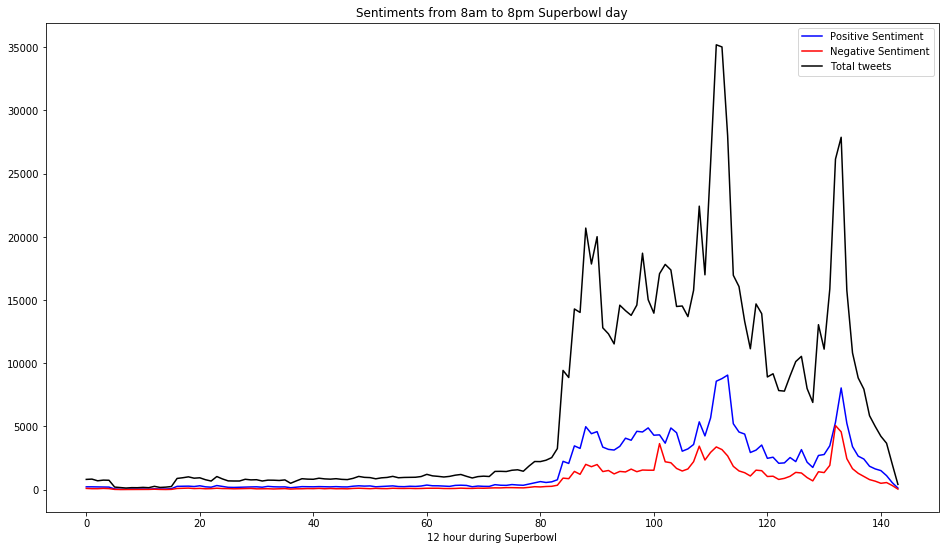

In [88]:
plt.figure(figsize=(16,9))
plt.plot(my_positive_sentiment,'blue')
plt.plot(my_negative_sentiment,'red')
plt.plot(my_tweet_count, 'black')
plt.title('Sentiments from 8am to 8pm Superbowl day')
plt.xlabel('12 hour during Superbowl')
plt.legend(['Positive Sentiment','Negative Sentiment', 'Total tweets'])
plt.show()

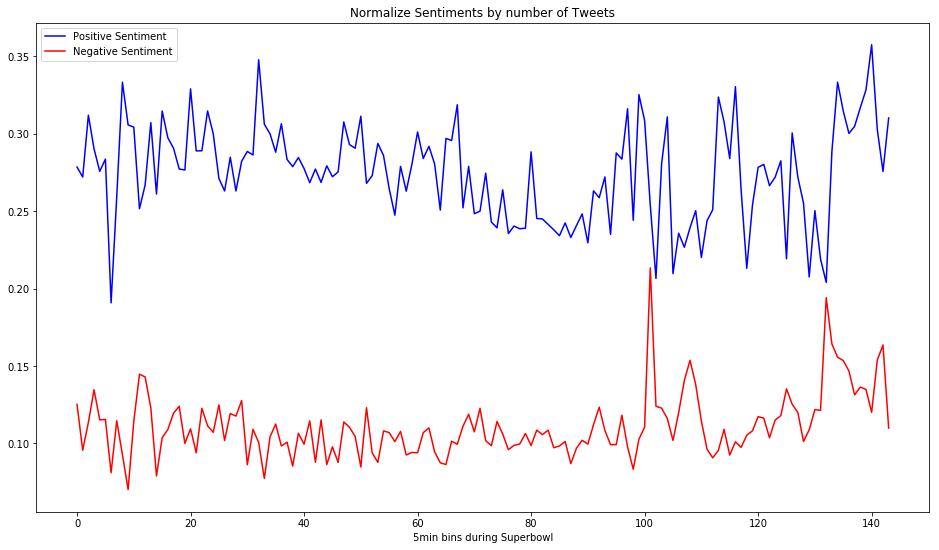

In [89]:
norm_negative=np.asarray(my_negative_sentiment)/np.asarray(my_tweet_count)
norm_positive=np.asarray(my_positive_sentiment)/np.asarray(my_tweet_count)
plt.figure(figsize=(16,9))
plt.plot(norm_positive,'blue')
plt.plot(norm_negative,'red')
# plt.plot(my_tweet_count, 'black')
plt.title('Normalize Sentiments by number of Tweets')
plt.xlabel('5min bins during Superbowl')
plt.legend(['Positive Sentiment','Negative Sentiment'])
plt.show()

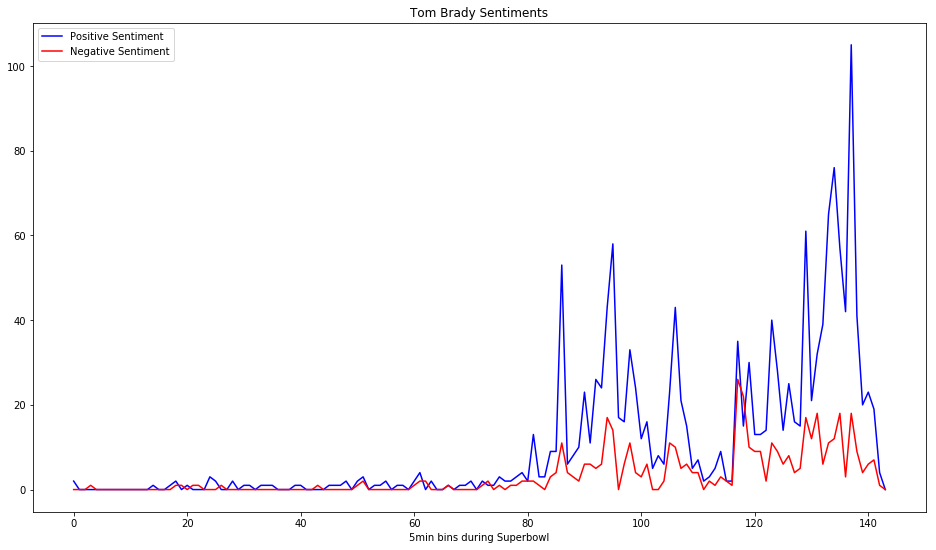

In [80]:
"plt.figure(figsize=(16,9))
plt.plot(my_Brady_positive,'blue')
plt.plot(my_Brady_negative,'red')
# plt.plot(my_tweet_count, 'black')
plt.xlabel('5min bins during Superbowl')
plt.title('Tom Brady Sentiments')
plt.legend(['Positive Sentiment','Negative Sentiment'])
plt.show()

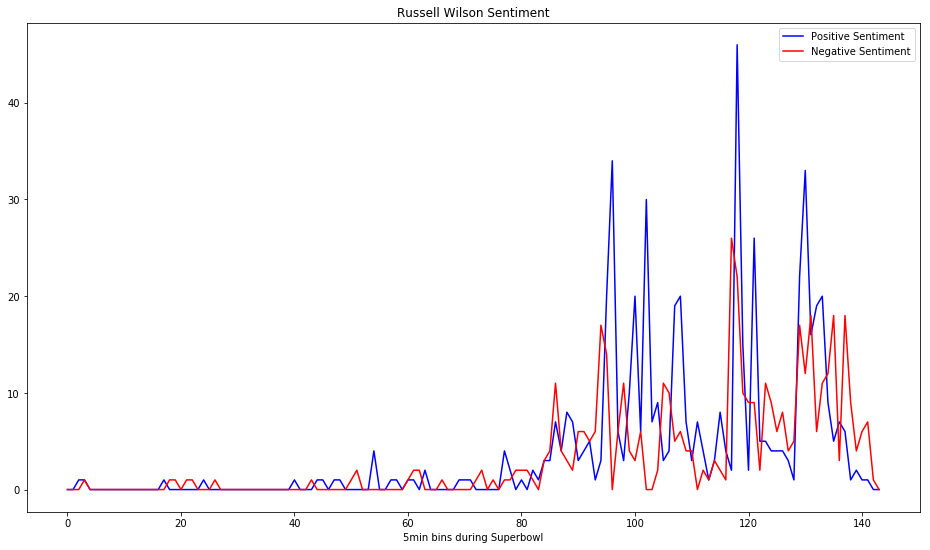

In [81]:
plt.figure(figsize=(16,9))
plt.plot(my_Wilson_positive,'blue')
plt.plot(my_Wilson_negative,'red')
# plt.plot(my_tweet_count, 'black')
plt.title('Russell Wilson Sentiment')
plt.xlabel('5min bins during Superbowl')
plt.legend(['Positive Sentiment','Negative Sentiment'])
plt.show()

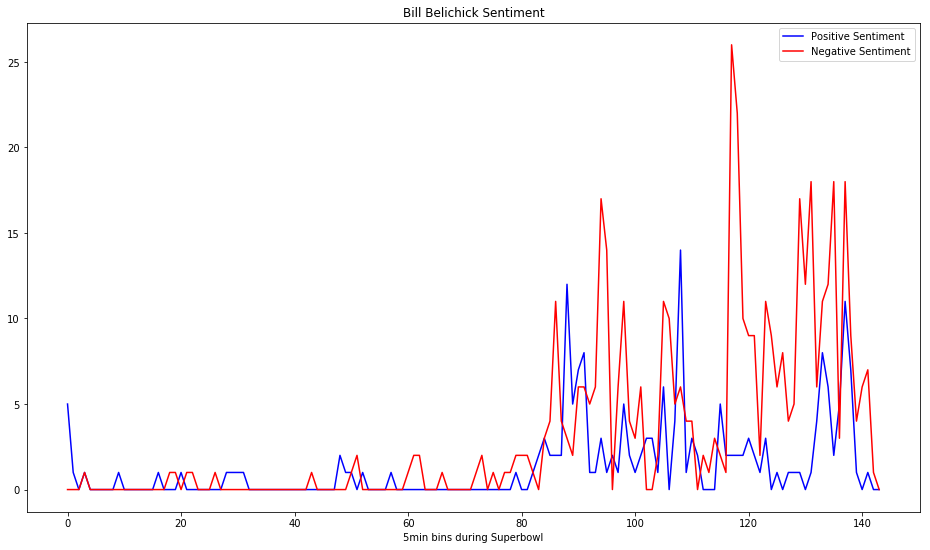

In [83]:
plt.figure(figsize=(16,9))
plt.plot(my_Bill_positive,'blue')
plt.plot(my_Bill_negative,'red')
# plt.plot(my_tweet_count, 'black')
plt.title('Bill Belichick Sentiment')
plt.xlabel('5min bins during Superbowl')
plt.legend(['Positive Sentiment','Negative Sentiment'])
plt.show()

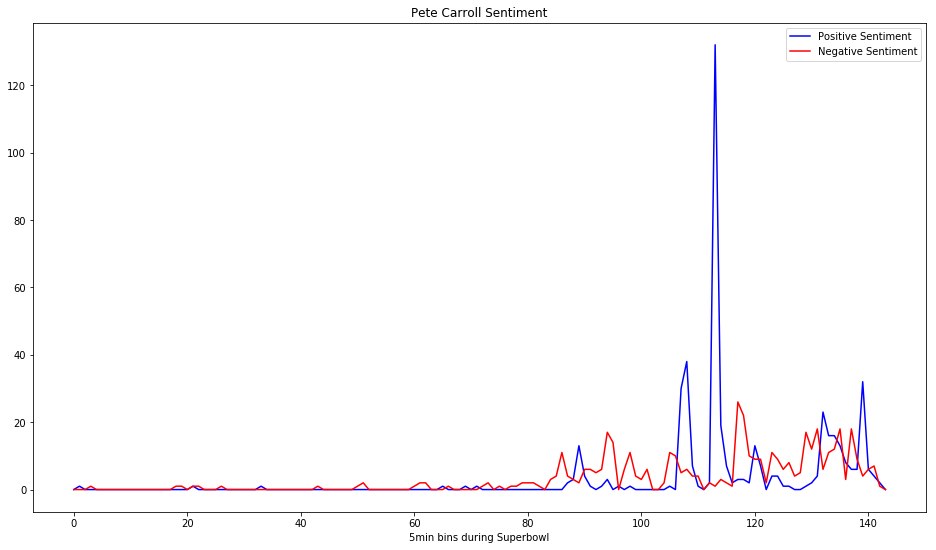

In [84]:
plt.figure(figsize=(16,9))
plt.plot(my_Carroll_positive,'blue')
plt.plot(my_Carroll_negative,'red')
# plt.plot(my_tweet_count, 'black')
plt.title('Pete Carroll Sentiment')
plt.xlabel('5min bins during Superbowl')
plt.legend(['Positive Sentiment','Negative Sentiment'])
plt.show()

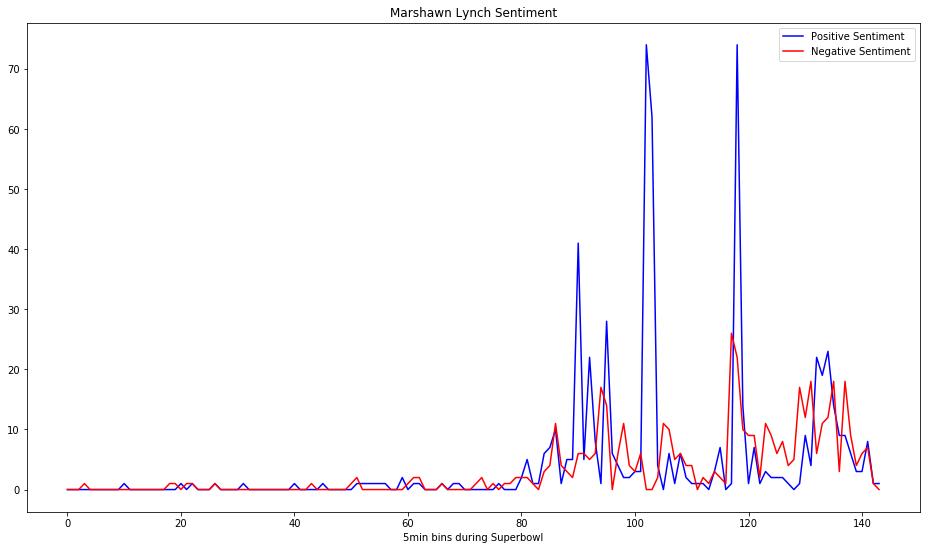

In [85]:
plt.figure(figsize=(16,9))
plt.plot(my_Lynch_positive,'blue')
plt.plot(my_Lynch_negative,'red')
# plt.plot(my_tweet_count, 'black')
plt.title('Marshawn Lynch Sentiment')
plt.xlabel('5min bins during Superbowl')
plt.legend(['Positive Sentiment','Negative Sentiment'])
plt.show()

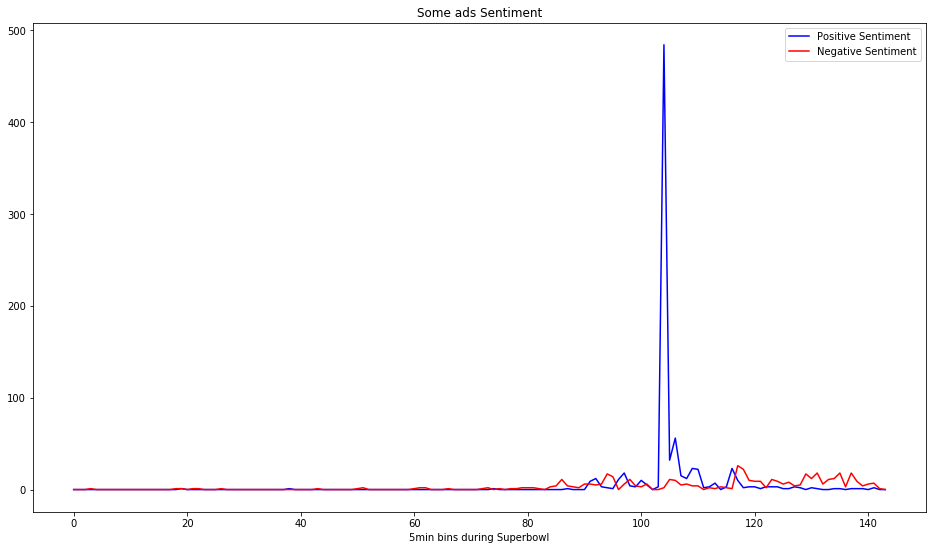

In [86]:
plt.figure(figsize=(16,9))
plt.plot(my_ads_positive,'blue')
plt.plot(my_ads_negative,'red')
# plt.plot(my_tweet_count, 'black')
plt.title('Some ads Sentiment')
plt.xlabel('5min bins during Superbowl')
plt.legend(['Positive Sentiment','Negative Sentiment'])
plt.show()